In [11]:
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *
import pandas as pd

In [13]:
import torch

print(torch.__version__)
print(torch)

1.11.0+cpu
<module 'torch' from 'E:\\programs\\envs\\species-id\\lib\\site-packages\\torch\\__init__.py'>


## Running Moment to Moment Labeling System on a Directory of WAV Files 

In [3]:
path = "./TEST/"
tweety_output=True

### Dictionary that defines the isolation technique and parameters used to generate automated labels 

In [4]:
isolation_parameters = {
    "technique" : "steinberg",
    "threshold_type" : "median",
    "threshold_const" : 1.0,
    "threshold_min" : 0.7,
    "window_size" : 0.2,
    "chunk_size" : 0.2
}

In [5]:
automated_df = generate_automated_labels(path,isolation_parameters, ml_model="tweetynet", tweety_output=tweety_output, normalize_local_scores=True); #make this function work with tweetynet
# need a better way to generate our output. 

(1376,)
[array([1, 1, 1, ..., 1, 1, 1], dtype=int64)]
     uid  pred  label  time_bins  local_score
0    0_f     1      0   0.000000     3.554691
1    0_f     1      0   0.023256     2.469064
2    0_f     1      0   0.046512     2.344688
3    0_f     1      0   0.069767     2.648643
4    0_f     1      0   0.093023     3.180452
..   ...   ...    ...        ...          ...
81  15_f     1      0  31.883721     0.855570
82  15_f     1      0  31.906977     1.147540
83  15_f     1      0  31.930233     0.745502
84  15_f     1      0  31.953488     2.480999
85  15_f     1      0  31.976744     2.845284

[1376 rows x 5 columns]
here ScreamingPiha1.wav
saved_csv
made it
(3784,)
[array([0, 1, 1, ..., 1, 1, 1], dtype=int64)]
     uid  pred  label  time_bins  local_score
0    0_f     0      0   0.000000    -0.421556
1    0_f     1      0   0.023256     1.956801
2    0_f     1      0   0.046512     2.249160
3    0_f     1      0   0.069767     1.437294
4    0_f     1      0   0.093023     2.4743

### Pandas Ouput of Automated Labeling 

In [6]:
automated_df

OFFSET   DURATION   FOLDER             IN FILE  CHANNEL  CLIP LENGTH  \
0      0.000000   4.906977  ./TEST/  ScreamingPiha1.wav        0    32.615986   
1      4.906977   0.139535  ./TEST/  ScreamingPiha1.wav        0    32.615986   
2      5.046512   0.023256  ./TEST/  ScreamingPiha1.wav        0    32.615986   
3      5.069767   0.023256  ./TEST/  ScreamingPiha1.wav        0    32.615986   
4      5.093023   0.186047  ./TEST/  ScreamingPiha1.wav        0    32.615986   
...         ...        ...      ...                 ...      ...          ...   
1449  23.674419   0.069767  ./TEST/  ScreamingPiha9.wav        0    37.302857   
1450  23.744186   0.023256  ./TEST/  ScreamingPiha9.wav        0    37.302857   
1451  23.767442   0.023256  ./TEST/  ScreamingPiha9.wav        0    37.302857   
1452  23.790698   0.023256  ./TEST/  ScreamingPiha9.wav        0    37.302857   
1453  23.813953  36.000000  ./TEST/  ScreamingPiha9.wav        0    37.302857   

      SAMPLE RATE MANUAL ID  
0           44100      bird  
1           44100      bird  
2           44100      bird  
3           44100      bird  
4           44100      bird  
...           ...       ...  
1449        44100      bird  
1450        44100      bird  
1451        44100      bird  
1452        44100      bird  
1453        44100      bird  

[1454 rows x 8 columns]

### Function that gathers statistics about the duration of annotations

In [7]:
annotation_duration_statistics(automated_df)

COUNT  MODE      MEAN  STANDARD DEVIATION       MIN        Q1    MEDIAN  \
0   1454  0.02  0.730655            5.567986  0.023256  0.023256  0.023256   

         Q3    MAX  
0  0.093023  132.0

### Human Manual Labels for Comparison 

In [8]:
manual_df = pd.read_csv("ScreamingPiha_Manual_Labels.csv")
#manual_df = pd.read_csv("BirdCLEF2020_Validation.csv")
manual_df

FOLDER             IN FILE  CLIP LENGTH  CHANNEL   OFFSET  DURATION  \
0    ./TEST/  ScreamingPiha1.wav      32.6160        0   1.5448    2.1297   
1    ./TEST/  ScreamingPiha1.wav      32.6160        0  10.1638    0.8498   
2    ./TEST/  ScreamingPiha1.wav      32.6160        0   0.5549    0.9999   
3    ./TEST/  ScreamingPiha1.wav      32.6160        0   8.7739    0.8399   
4    ./TEST/  ScreamingPiha1.wav      32.6160        0  12.6335    1.9997   
..       ...                 ...          ...      ...      ...       ...   
249  ./TEST/  ScreamingPiha2.wav      33.9331        0  26.9274    1.7602   
250  ./TEST/  ScreamingPiha2.wav      33.9331        0  30.8178    0.7200   
251  ./TEST/  ScreamingPiha2.wav      33.9331        0  29.8677    0.9401   
252  ./TEST/  ScreamingPiha2.wav      33.9331        0  31.5378    1.9502   
253  ./TEST/  ScreamingPiha2.wav      33.9331        0  33.7880    0.1100   

     SAMPLING RATE MANUAL ID  
0            16000      bird  
1            16000      bird  
2            16000      bird  
3            16000      bird  
4            16000      bird  
..             ...       ...  
249          44100      bird  
250          44100      bird  
251          44100      bird  
252          44100      bird  
253          44100      bird  

[254 rows x 8 columns]

In [9]:
annotation_duration_statistics(manual_df)

COUNT  MODE      MEAN  STANDARD DEVIATION   MIN        Q1   MEDIAN  \
0    254  1.87  1.068224            0.664488  0.11  0.532475  0.78005   

         Q3     MAX  
0  1.767475  3.1199

### Histogram Visualization of Annotation Lengths

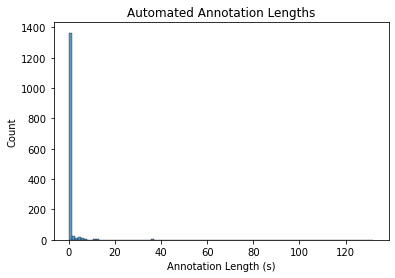

In [10]:
annotation_duration_histogram(automated_df, n_bins = 100, title = "Automated Annotation Lengths")

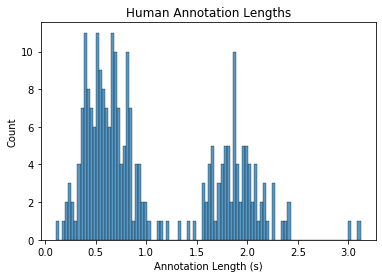

In [ ]:
annotation_duration_histogram(manual_df, n_bins = 100, title = "Human Annotation Lengths")
# In the Screaming Piha clips we can see two distinct clusters based on the "Whoa" vocalizations (.25-1.25s)
# and the "Pee-Haw" vocalizations (1.25-2.5s)

### Helper function to convert to kaleidoscope-compatible format 

In [ ]:
kaleidoscope_conversion(manual_df)

FOLDER             IN FILE  CHANNEL   OFFSET  DURATION MANUAL ID
0    ./TEST  ScreamingPiha1.wav        0   1.5448    2.1297      bird
1    ./TEST  ScreamingPiha1.wav        0  10.1638    0.8498      bird
2    ./TEST  ScreamingPiha1.wav        0   0.5549    0.9999      bird
3    ./TEST  ScreamingPiha1.wav        0   8.7739    0.8399      bird
4    ./TEST  ScreamingPiha1.wav        0  12.6335    1.9997      bird
..      ...                 ...      ...      ...       ...       ...
249  ./TEST  ScreamingPiha2.wav        0  26.9274    1.7602      bird
250  ./TEST  ScreamingPiha2.wav        0  30.8178    0.7200      bird
251  ./TEST  ScreamingPiha2.wav        0  29.8677    0.9401      bird
252  ./TEST  ScreamingPiha2.wav        0  31.5378    1.9502      bird
253  ./TEST  ScreamingPiha2.wav        0  33.7880    0.1100      bird

[254 rows x 6 columns]

## Different Combinations of Local Score Visualization Graphs

### Baseline Graph without any annotations

No handles with labels found to put in legend.


(1462,)


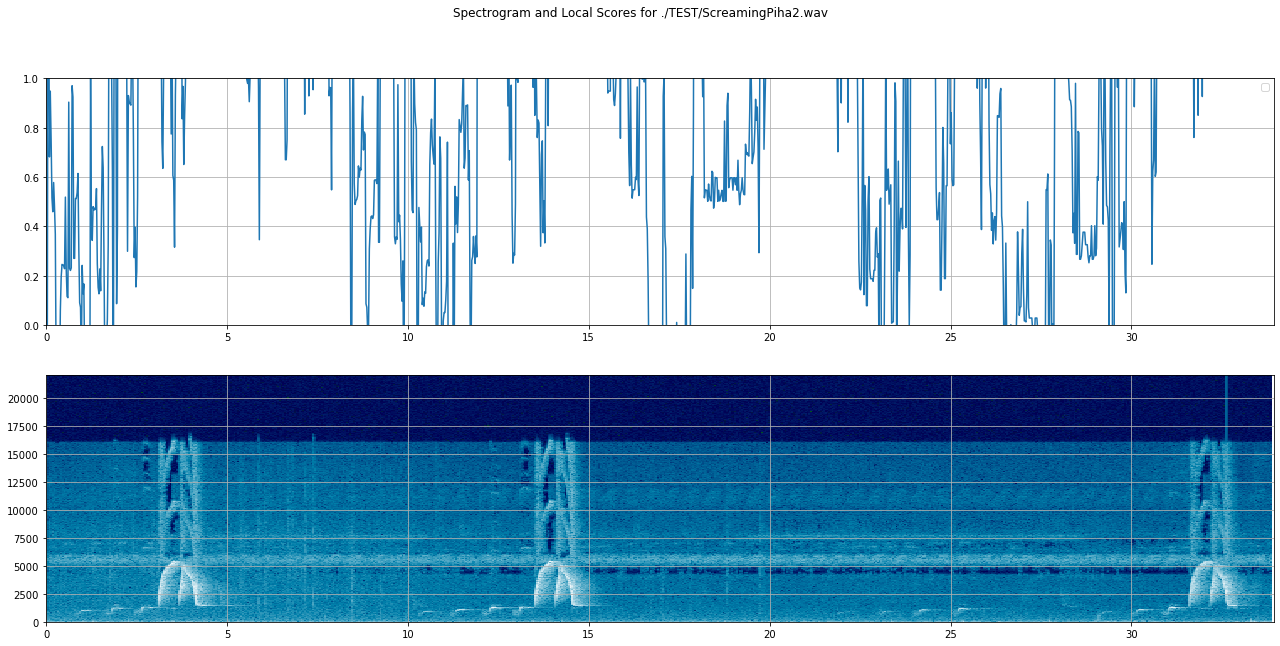

In [ ]:
clip_path = "./TEST/ScreamingPiha2.wav"
local_score_visualization(clip_path, tweety_output=tweety_output)

### Baseline graph with log scale

No handles with labels found to put in legend.


(1462,)


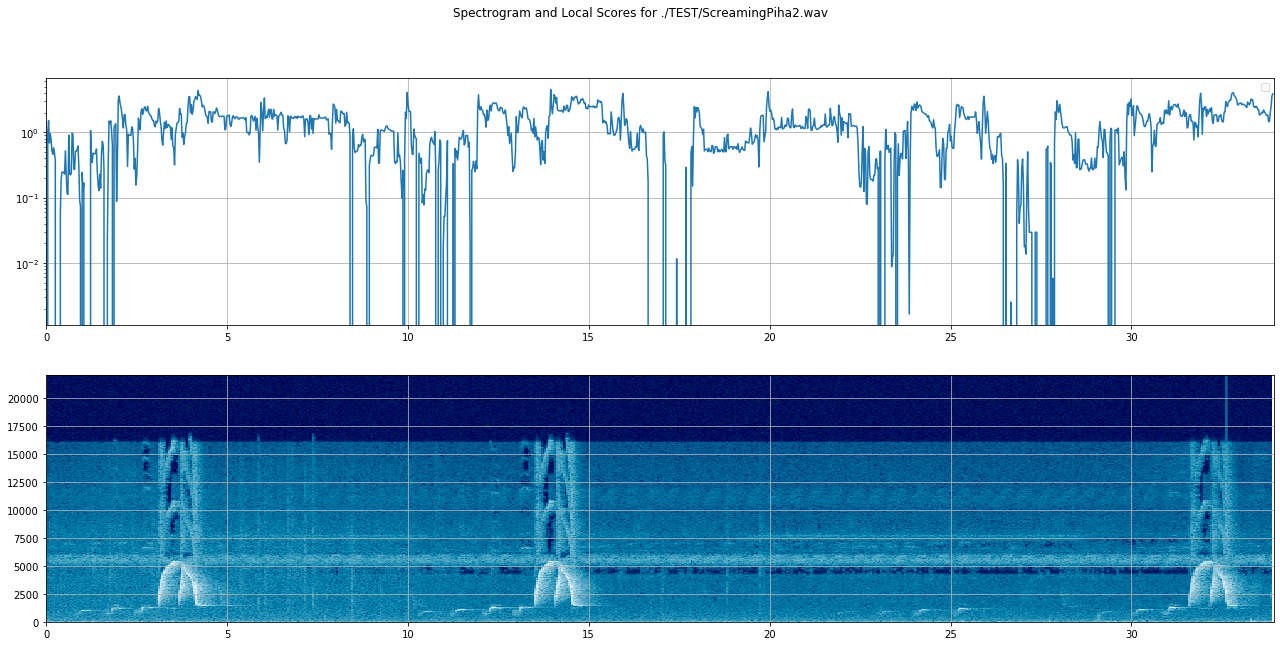

In [ ]:
local_score_visualization(clip_path,log_scale = True, tweety_output=tweety_output)

### Baseline graph with normalized local score values between [0,1] 

No handles with labels found to put in legend.


(1462,)


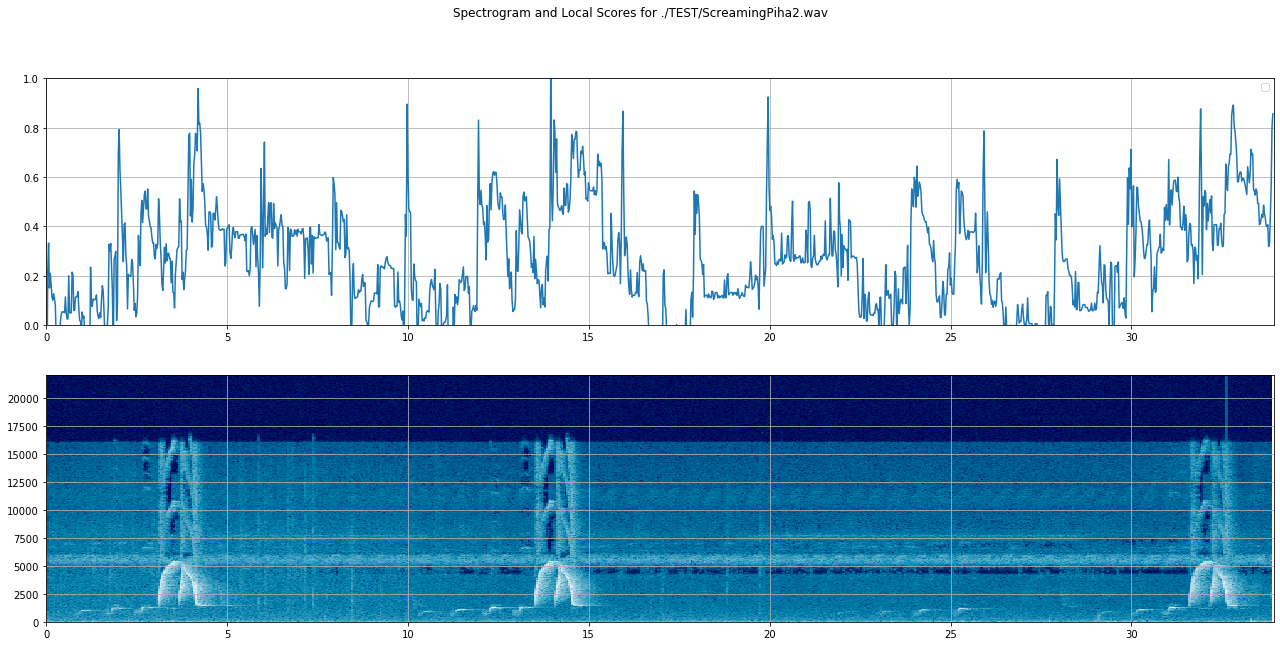

In [ ]:
local_score_visualization(clip_path, normalize_local_scores = True, tweety_output=tweety_output)

### Graph with Automated Labeling 

(1462,)
made it


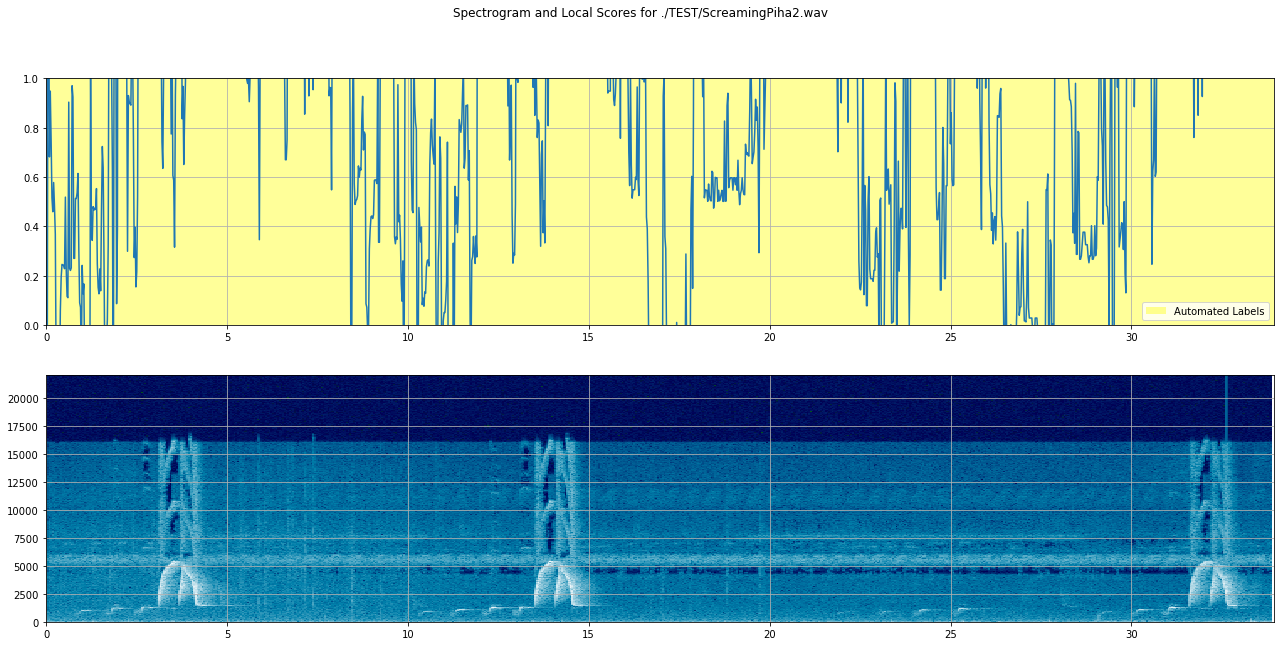

In [ ]:
local_score_visualization(clip_path,automated_df = True, isolation_parameters = isolation_parameters, tweety_output=tweety_output)

### Graph with Human Labelling

(1462,)


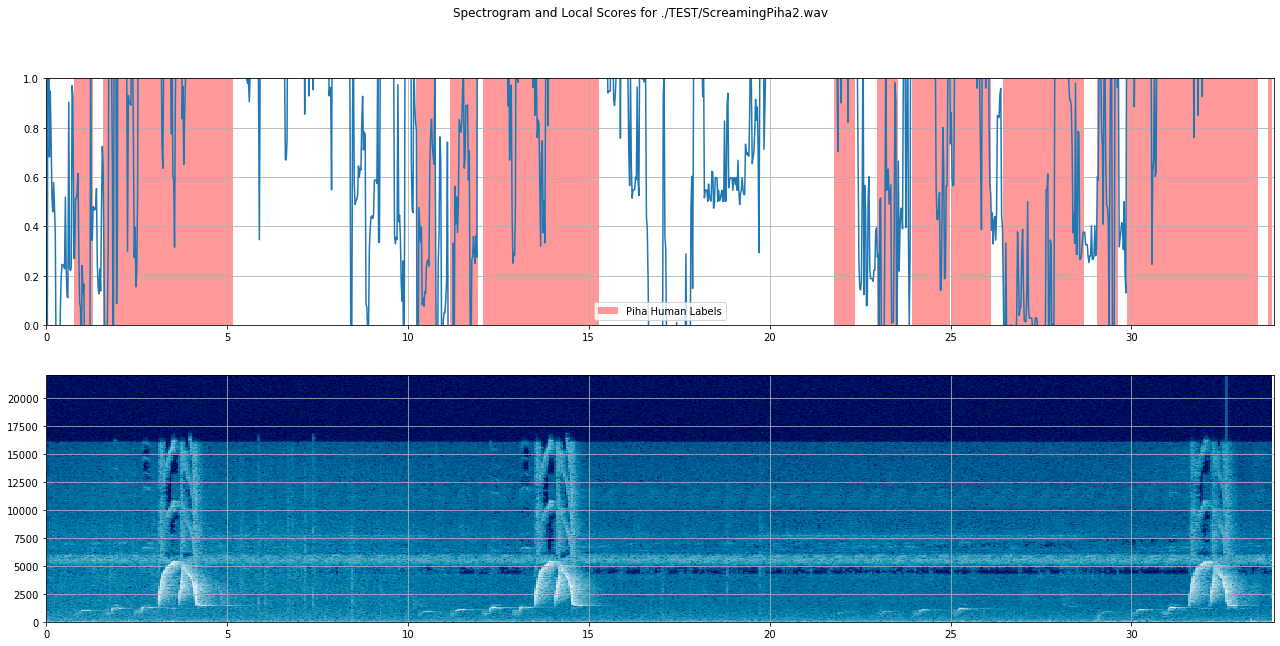

In [ ]:
local_score_visualization(clip_path, tweety_output=tweety_output, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"],premade_annotations_label = "Piha Human Labels")

### Graph with Both Automated and Human Labels 
    Orange ==> True Positive
    Red ==> False Negative
    Yellow ==> False Positive
    White ==> True Negative

(1462,)
made it


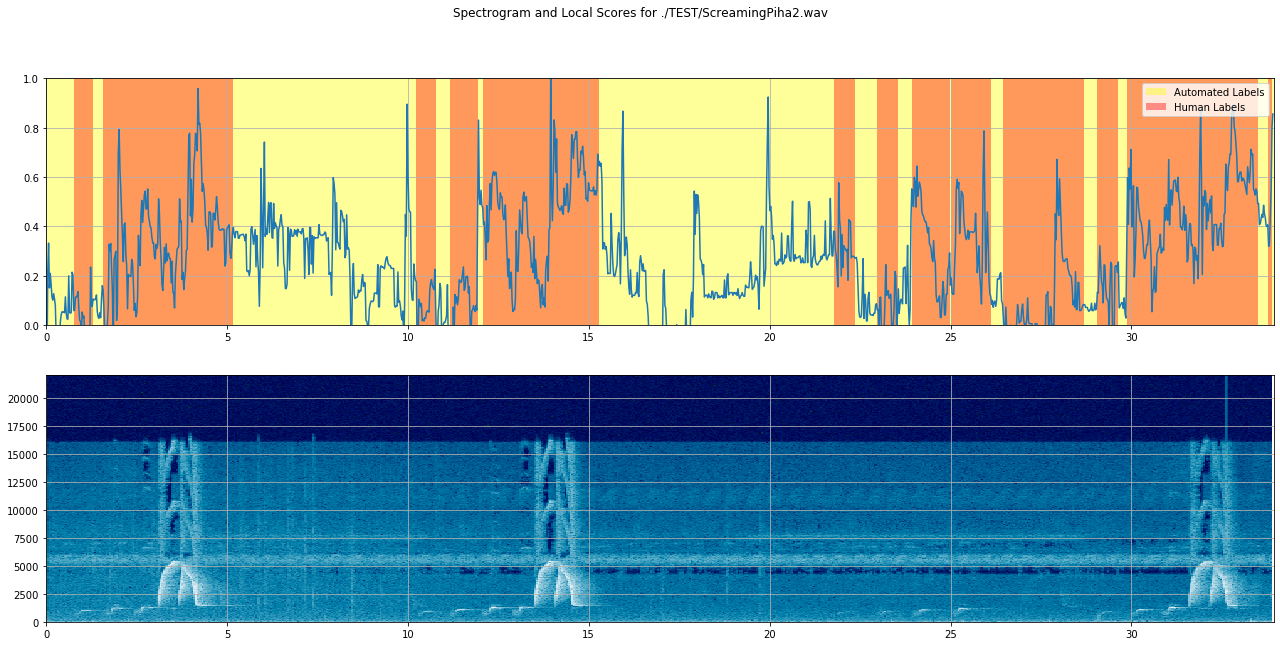

In [ ]:
local_score_visualization(clip_path,automated_df = True, normalize_local_scores = True, isolation_parameters=isolation_parameters,tweety_output=tweety_output, premade_annotations_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"])

In [ ]:
clip_path_2 = "TEST/Aburria-aburri-257423.wav"
manual_df_2 = pd.read_csv("for_data_science_newline_fixed.csv")


(1032,)
made it


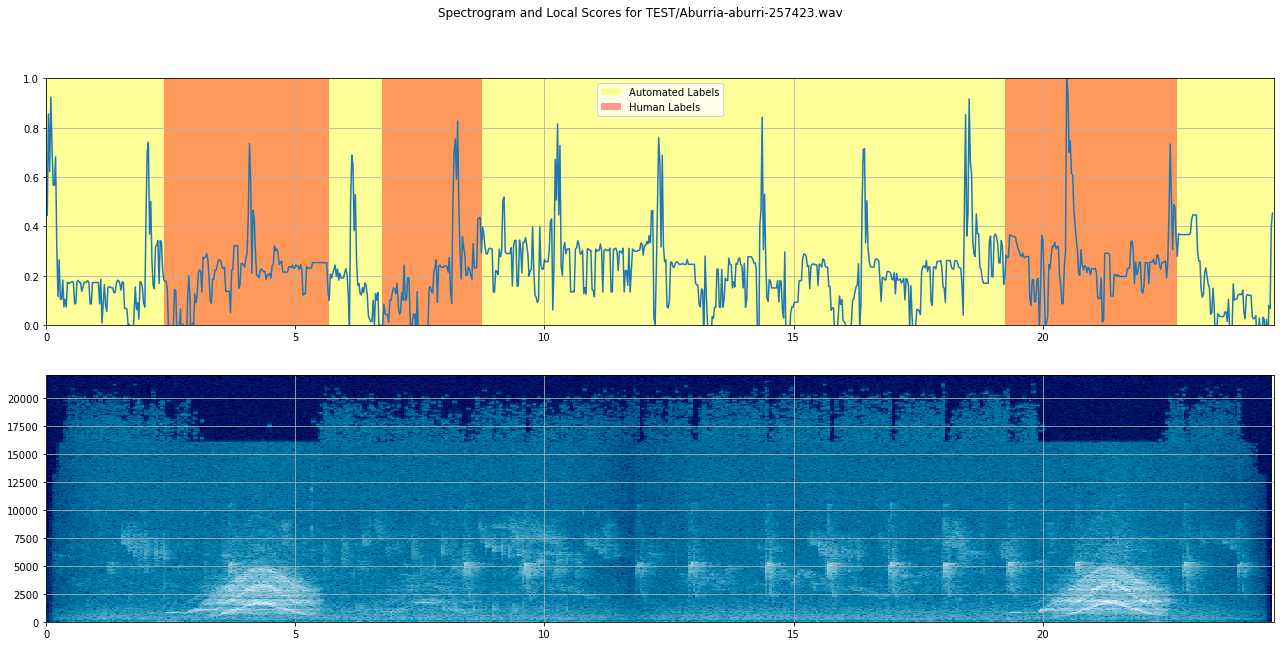

In [ ]:
local_score_visualization(clip_path_2,automated_df = True, normalize_local_scores = True, isolation_parameters=isolation_parameters,tweety_output=tweety_output, premade_annotations_df = manual_df_2[manual_df_2["IN FILE"] == "Aburria-aburri-257423.wav"])

### Another Visualization of True Positives, False Positives, False Negatives, and True Negatives 

In [ ]:
automated_df


OFFSET   DURATION   FOLDER                    IN FILE  CHANNEL  \
0      0.000000   1.627907  ./TEST/  Aburria-aburri-257423.wav        0   
1      1.627907   0.023256  ./TEST/  Aburria-aburri-257423.wav        0   
2      1.651163   0.023256  ./TEST/  Aburria-aburri-257423.wav        0   
3      1.674419   0.023256  ./TEST/  Aburria-aburri-257423.wav        0   
4      1.697674   0.697674  ./TEST/  Aburria-aburri-257423.wav        0   
...         ...        ...      ...                        ...      ...   
1523  10.651163   0.883721  ./TEST/         ScreamingPiha4.wav        0   
1524  11.534884   0.186047  ./TEST/         ScreamingPiha4.wav        0   
1525  11.720930   0.023256  ./TEST/         ScreamingPiha4.wav        0   
1526  11.744186   0.116279  ./TEST/         ScreamingPiha4.wav        0   
1527  11.860465  12.000000  ./TEST/         ScreamingPiha4.wav        0   

      CLIP LENGTH  SAMPLE RATE MANUAL ID  
0       24.633469        44100      bird  
1       24.633469        44100      bird  
2       24.633469        44100      bird  
3       24.633469        44100      bird  
4       24.633469        44100      bird  
...           ...          ...       ...  
1523    13.557551        44100      bird  
1524    13.557551        44100      bird  
1525    13.557551        44100      bird  
1526    13.557551        44100      bird  
1527    13.557551        44100      bird  

[1528 rows x 8 columns]

In [ ]:
automated_df[automated_df["IN FILE"] == "Aburria-aburri-257423.wav"]

OFFSET   DURATION   FOLDER                    IN FILE  CHANNEL  \
0    0.000000   1.627907  ./TEST/  Aburria-aburri-257423.wav        0   
1    1.627907   0.023256  ./TEST/  Aburria-aburri-257423.wav        0   
2    1.651163   0.023256  ./TEST/  Aburria-aburri-257423.wav        0   
3    1.674419   0.023256  ./TEST/  Aburria-aburri-257423.wav        0   
4    1.697674   0.697674  ./TEST/  Aburria-aburri-257423.wav        0   
..        ...        ...      ...                        ...      ...   
69  23.697674   0.046512  ./TEST/  Aburria-aburri-257423.wav        0   
70  23.744186   0.023256  ./TEST/  Aburria-aburri-257423.wav        0   
71  23.767442   0.069767  ./TEST/  Aburria-aburri-257423.wav        0   
72  23.837209   0.046512  ./TEST/  Aburria-aburri-257423.wav        0   
73  23.883721  24.000000  ./TEST/  Aburria-aburri-257423.wav        0   

    CLIP LENGTH  SAMPLE RATE MANUAL ID  
0     24.633469        44100      bird  
1     24.633469        44100      bird  
2     24.633469        44100      bird  
3     24.633469        44100      bird  
4     24.633469        44100      bird  
..          ...          ...       ...  
69    24.633469        44100      bird  
70    24.633469        44100      bird  
71    24.633469        44100      bird  
72    24.633469        44100      bird  
73    24.633469        44100      bird  

[74 rows x 8 columns]

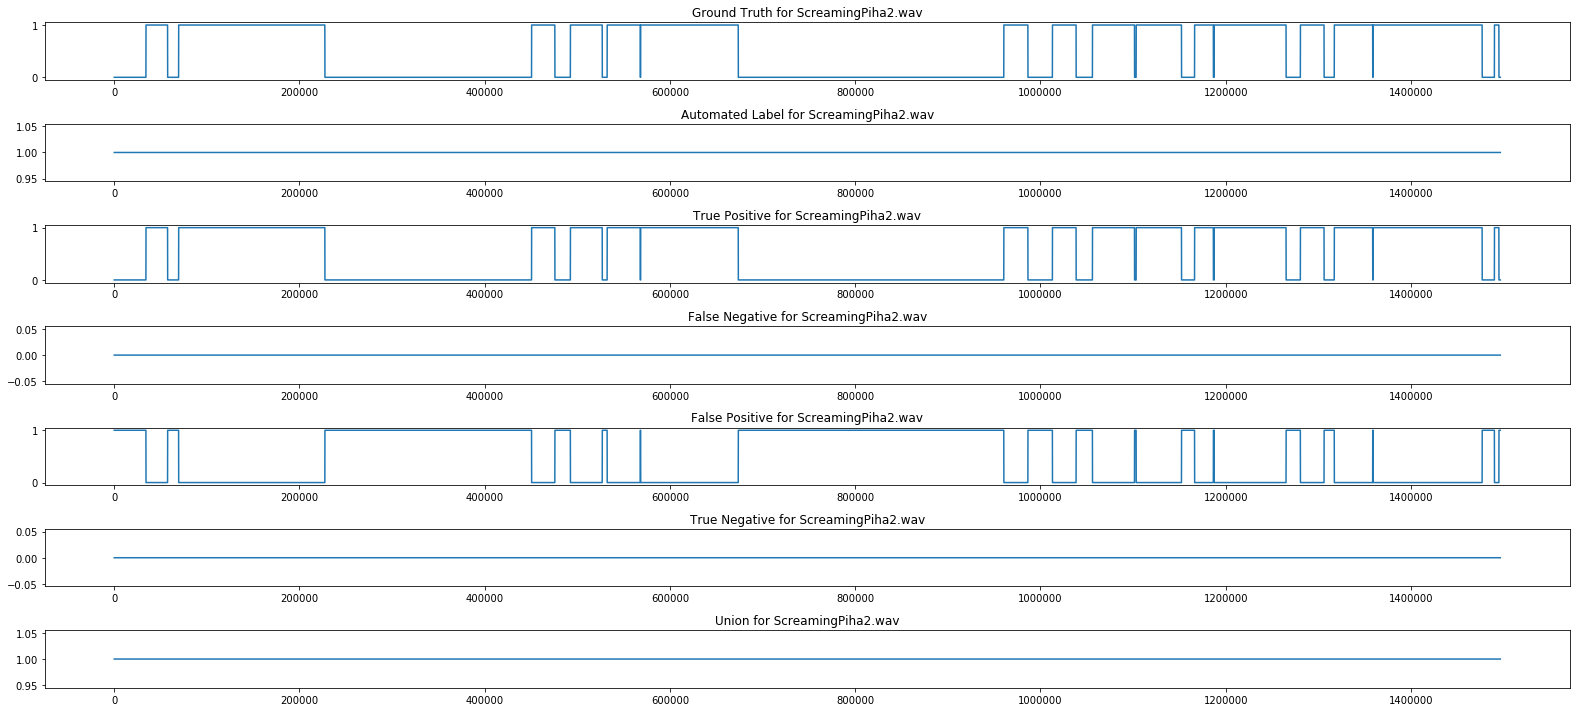

In [ ]:
automated_piha_df = automated_df[automated_df["IN FILE"] == "ScreamingPiha2.wav"]
manual_piha_df = manual_df[manual_df["IN FILE"] == "ScreamingPiha2.wav"]
piha_stats = plot_bird_label_scores(automated_piha_df,manual_piha_df)

### Function that generates statistics to gauge efficacy of automated labeling compared to human labels 

In [ ]:
statistics_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "general");
statistics_df

Something went wrong with: Aburria-aburri-257423.wav


FOLDER              IN FILE MANUAL ID  TRUE POSITIVE  FALSE POSITIVE  \
0   ./TEST/   ScreamingPiha9.wav      bird      28.592426        8.710431   
1   ./TEST/   ScreamingPiha8.wav      bird       6.900091       37.220726   
2   ./TEST/  ScreamingPiha10.wav      bird      39.381293       50.401565   
3   ./TEST/   ScreamingPiha1.wav      bird      14.288209       18.327778   
4   ./TEST/  ScreamingPiha11.wav      bird      37.817370       26.078141   
5   ./TEST/   ScreamingPiha3.wav      bird       4.455692        2.388390   
6   ./TEST/   ScreamingPiha2.wav      bird      18.491723       15.441338   
7   ./TEST/   ScreamingPiha6.wav      bird      24.858254       45.776825   
8   ./TEST/   ScreamingPiha7.wav      bird      51.630204       81.960000   
9   ./TEST/   ScreamingPiha5.wav      bird      35.298639       18.879320   
10  ./TEST/   ScreamingPiha4.wav      bird       5.401565        8.155986   

    FALSE NEGATIVE  TRUE NEGATIVE       UNION  PRECISION  RECALL        F1  \
0              0.0            0.0   37.302857   0.766494     1.0  0.867814   
1              0.0            0.0   44.120816   0.156391     1.0  0.270481   
2              0.0            0.0   89.782857   0.438628     1.0  0.609787   
3              0.0            0.0   32.615986   0.438074     1.0  0.609251   
4              0.0            0.0   63.895510   0.591863     1.0  0.743610   
5              0.0            0.0    6.844082   0.651028     1.0  0.788634   
6              0.0            0.0   33.933061   0.544947     1.0  0.705457   
7              0.0            0.0   70.635079   0.351925     1.0  0.520628   
8              0.0            0.0  133.590204   0.386482     1.0  0.557500   
9              0.0            0.0   54.177959   0.651531     1.0  0.789003   
10             0.0            0.0   13.557551   0.398417     1.0  0.569812   

    Global IoU  
0     0.766494  
1     0.156391  
2     0.438628  
3     0.438074  
4     0.591863  
5     0.651028  
6     0.544947  
7     0.351925  
8     0.386482  
9     0.651531  
10    0.398417

### Function that takes the statistical ouput of all of the clips and gets the equivalent global scores 

In [ ]:
global_dataset_statistics(statistics_df)

MANUAL ID  PRECISION  RECALL        F1  Global IoU
0      bird   0.460182     1.0  0.630308    0.460182

### Function that takes in the manual and automated labels for a clip and outputs human label-by-label IoU Scores. Used to derive statistics that measure how well a system is isolating desired segments of audio clips

In [ ]:
Intersection_over_Union_Matrix = clip_IoU(automated_piha_df,manual_piha_df)
print(Intersection_over_Union_Matrix)

[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.216 ]
 [0.     0.     0.     ... 0.     0.     0.4482]
 [0.     0.     0.     ... 0.     0.     0.0253]]


### Function that turns the IoU Matrix of a clip into true positive and false positives values, as well as computing the precision, recall, and F1 statistics

In [ ]:
matrix_IoU_Scores(Intersection_over_Union_Matrix,manual_piha_df,0.5)

FOLDER             IN FILE MANUAL ID  TRUE POSITIVE  FALSE NEGATIVE  \
0  ./TEST/  ScreamingPiha2.wav      bird              2              18   

   FALSE POSITIVE  PRECISION  RECALL      F1  
0             151     0.0131     0.1  0.0232

### Wrapper function that takes matrix_IoU_Scores across multiple clips. Allows user to modify the threshold that determines whether or not a label is a true positive.

In [ ]:
stats_df = automated_labeling_statistics(automated_df,manual_df,stats_type = "IoU",threshold = 0.5)
stats_df

Something went wrong with: Aburria-aburri-257423.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha10.wav
Something went wrong with: ScreamingPiha11.wav
Division by zero setting precision, recall, and f1 to zero on ScreamingPiha3.wav


### Function that takes the output of dataset_IoU Statistics and ouputs a global count of true positives and false positives, as well as computing common metrics across the dataset

In [ ]:
global_stats_df = global_IoU_Statistics(stats_df)
global_stats_df

MANUAL ID  TRUE POSITIVE  FALSE NEGATIVE  FALSE POSITIVE  PRECISION  RECALL  \
0      bird             69             185            1271     0.0515  0.2717   

       F1  
0  0.0866